In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
%matplotlib inline

2023-10-31 22:24:15.805301: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 22:24:15.834386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-31 22:24:15.834872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-31 22:24:16.445160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow import keras
from tensorflow.keras import models, layers, callbacks, activations, optimizers

In [4]:
from data_4_models import data_arrays, input_shape_check

In [5]:
x_train, y_train, x_valid, y_valid, x_test, y_test, alphabet = data_arrays(data_path= '/home/pgarcia/rbp_project/data/PUM2_K562_200.h5')
print(x_train.shape, y_train.shape)

(10147, 200, 9) (10147, 1)


In [6]:
x_train, x_test, x_valid = input_shape_check(x_train, x_test,x_valid)

Input shape adjusted:
(10147, 200, 4)
(2900, 200, 4)
(1449, 200, 4)


In [7]:
x_train.shape

(10147, 200, 4)

In [8]:
y_train.shape

(10147, 1)

# DeepBind Model

In [9]:
from rbp_models import deepbind, deepbind_exp

In [10]:
model = deepbind()
loss = keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam(learning_rate = 0.005)

# Compile the model
model.compile(
    loss=loss,
    optimizer=opti, 
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", name="auroc"),
        tf.keras.metrics.AUC(curve="PR", name="aupr"),  # add AUPR curve to track dataset bias
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
    ]
    )

# Define an early stopping callback
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(
    x_train, y_train, 
    batch_size=100, 
    epochs=100, 
    validation_data=(x_valid, y_valid),
    callbacks=[es_callback]
)

2023-10-31 22:24:39.352662: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.5815 - auroc: 0.7571 - aupr: 0.7511 - binary_accuracy: 0.6842 - val_loss: 0.4191 - val_auroc: 0.9009 - val_aupr: 0.8956 - val_binary_accuracy: 0.8178
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3916 - auroc: 0.9048 - aupr: 0.8993 - binary_accuracy: 0.8252 - val_loss: 0.3122 - val_auroc: 0.9476 - val_aupr: 0.9457 - val_binary_accuracy: 0.8696
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3126 - auroc: 0.9402 - aupr: 0.9387 - binary_accuracy: 0.8662 - val_loss: 0.2690 - val_auroc: 0.9573 - val_aupr: 0.9538 - val_binary_accuracy: 0.8923
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2583 - auroc: 0.9592 - aupr: 0.9577 - binary_accuracy: 0.8964 - val_loss: 0.2847 - val_auroc: 0.9598 - val_aupr: 0.9551 - val_binary_accuracy: 0.8834
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2409 - auroc: 0

In [11]:
#evaluate the model
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 883us/step - loss: 0.3142 - auroc: 0.9475 - aupr: 0.9485 - binary_accuracy: 0.8714


[0.3141782879829407,
 0.9474862813949585,
 0.9485481381416321,
 0.8713793158531189]

In [12]:
x_test.shape

(2900, 200, 4)

In [13]:
x_test[1]

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],


In [14]:
predictions.shape

NameError: name 'predictions' is not defined

In [15]:
for i in sorted_indices[:num_plots]:
    if i == 44:
        print('True')
    else:
        print('False')

NameError: name 'sorted_indices' is not defined

In [44]:
print(sorted_indices)

[1396  224 2729 ...  909 1562  118]


In [33]:
predictions[1396]

array([1.], dtype=float32)

In [34]:
type(predictions[1396])

numpy.ndarray

In [43]:
x_test[1396] # best sequence for deepBind predictions

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [39]:
x_test[sorted_indices[:num_plots]]

array([[[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [1., 0.

In [38]:
len(x_test[sorted_indices[:num_plots]])

10

In [41]:
X

array([[[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [1., 0., 0., 0.]],

       [[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [1., 0.

Reminder contents of x_test do not change across different models. Predictions amd sorted_indices will change

In [82]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int8)

In [16]:
idx_ytest=[]
for i, entry in enumerate(y_test):
    if entry == 1:
        idx_ytest.append(i)
    

In [17]:
idx_ytest

[4,
 9,
 20,
 21,
 23,
 24,
 27,
 29,
 33,
 37,
 38,
 39,
 40,
 43,
 45,
 50,
 53,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 71,
 73,
 74,
 75,
 77,
 81,
 85,
 88,
 91,
 92,
 95,
 97,
 98,
 99,
 101,
 102,
 103,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 119,
 122,
 126,
 128,
 129,
 130,
 135,
 136,
 140,
 141,
 142,
 145,
 146,
 147,
 149,
 151,
 154,
 155,
 157,
 161,
 163,
 164,
 165,
 166,
 167,
 170,
 171,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 184,
 185,
 186,
 190,
 192,
 193,
 194,
 196,
 206,
 208,
 209,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 229,
 232,
 233,
 238,
 239,
 243,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 254,
 255,
 260,
 261,
 262,
 263,
 266,
 267,
 269,
 270,
 274,
 277,
 278,
 279,
 280,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 290,
 292,
 293,
 294,
 297,
 303,
 307,
 312,
 315,
 316,
 319,
 322,
 325,
 326,
 327,
 328,
 330,
 332,
 335,
 340,
 341,
 347,
 348,
 350,
 353,
 354,
 355,
 356,
 35

In [30]:
y_test.shape

(2900, 1)

In [32]:
# Make an empty list that will contain index of all positive occurences in y_test
idx_ytest=[]

#use enumerate function to get index of positive signals in y_test
for i, entry in enumerate(y_test):
    if entry == 1:
        idx_ytest.append(i)

# Make an array from the list that contains all positive signals from y_test 
idx_ytest_array = np.array(idx_ytest)

# Get a random number from array by using numpy.random.choice()
random_num = np.random.choice(idx_ytest_array)

print(random_num)




498


In [33]:
# Double check to see if number is in idx_ytest list
idx_ytest.count(498)

1

In [34]:
idx_ytest

[4,
 9,
 20,
 21,
 23,
 24,
 27,
 29,
 33,
 37,
 38,
 39,
 40,
 43,
 45,
 50,
 53,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 71,
 73,
 74,
 75,
 77,
 81,
 85,
 88,
 91,
 92,
 95,
 97,
 98,
 99,
 101,
 102,
 103,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 119,
 122,
 126,
 128,
 129,
 130,
 135,
 136,
 140,
 141,
 142,
 145,
 146,
 147,
 149,
 151,
 154,
 155,
 157,
 161,
 163,
 164,
 165,
 166,
 167,
 170,
 171,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 182,
 184,
 185,
 186,
 190,
 192,
 193,
 194,
 196,
 206,
 208,
 209,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 229,
 232,
 233,
 238,
 239,
 243,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 254,
 255,
 260,
 261,
 262,
 263,
 266,
 267,
 269,
 270,
 274,
 277,
 278,
 279,
 280,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 290,
 292,
 293,
 294,
 297,
 303,
 307,
 312,
 315,
 316,
 319,
 322,
 325,
 326,
 327,
 328,
 330,
 332,
 335,
 340,
 341,
 347,
 348,
 350,
 353,
 354,
 355,
 356,
 35

In [35]:
x_test.shape

(2900, 200, 4)

# Saliency Map calculation for deepbind for 1 sequence

(1, 200, 4)
tf.Tensor(
[[[ 1.19075164e-01 -8.35717097e-03 -6.26948252e-02  1.00259945e-01]
  [ 8.24597627e-02  2.24936649e-01 -3.13805670e-01  9.42880064e-02]
  [ 1.78212300e-01 -1.07228637e-01 -1.10878587e-01  2.79041771e-02]
  [-1.64324656e-01  7.91068971e-02  4.34442870e-02  1.96940765e-01]
  [ 8.14877599e-02 -1.46499947e-02  4.80336174e-02  2.13618912e-02]
  [ 2.68873900e-01  2.25277588e-01 -3.43121231e-01 -7.70920813e-02]
  [-3.58232763e-03  2.60275364e-01  3.78466547e-02  1.03548519e-01]
  [-7.59448633e-02 -7.52025843e-02  2.18197763e-01  1.42854244e-01]
  [-2.29779452e-01  2.95317769e-01  5.13344333e-02  5.79961389e-02]
  [ 2.28236005e-01 -1.00709513e-01  3.59748542e-01 -6.51289076e-02]
  [-2.61199810e-02 -6.09593205e-02 -4.61373944e-03  3.33135873e-02]
  [-4.72884960e-02 -5.73911518e-03 -3.81868422e-01  1.48634195e-01]
  [-2.63826717e-02  2.44339053e-02 -4.75442588e-01 -4.71420512e-02]
  [-3.02315503e-01  4.85745370e-02 -1.39079526e-01  1.65945217e-01]
  [-1.32066935e-01  5.304

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fd8646114c0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fd9814d61c0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

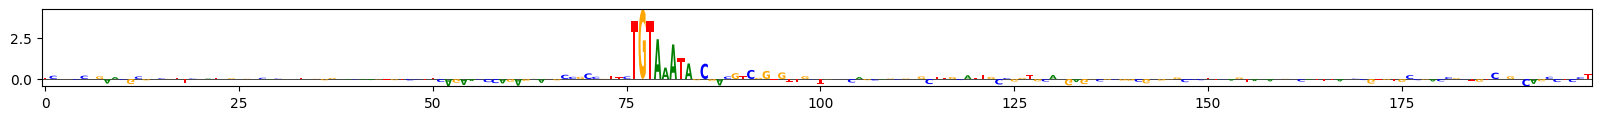

In [38]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[498:499]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f"sal_map_seq498_deepbind_PUM2.svg", dpi=300)
  
  #plt.savefig("myimg.svg", dpi=300)
  #sal_plots.append(fig) 

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fdd2aa3bf40>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fdd2b5efb80>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

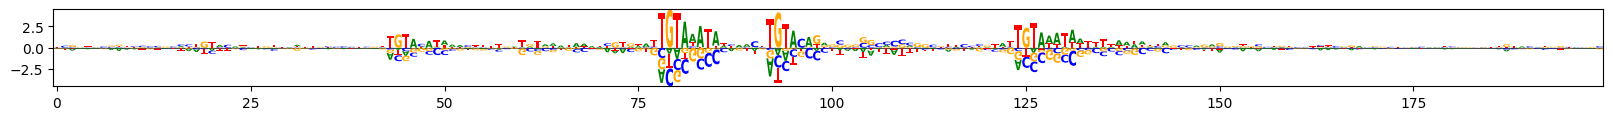

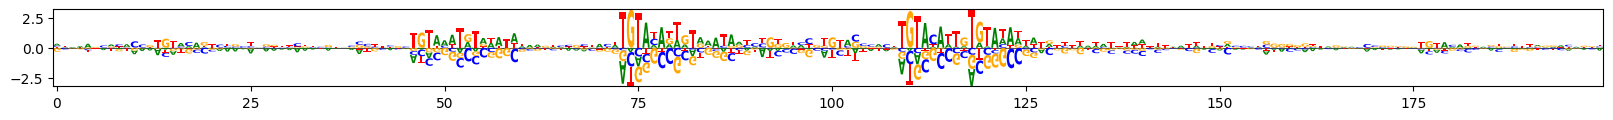

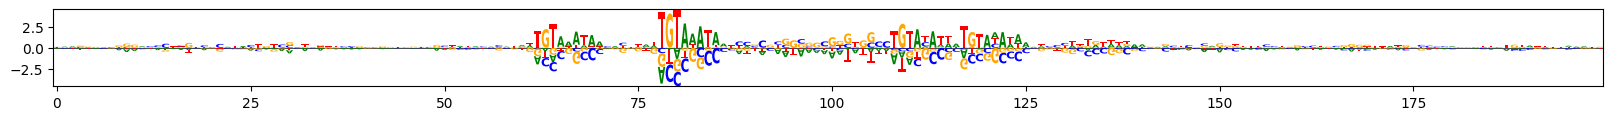

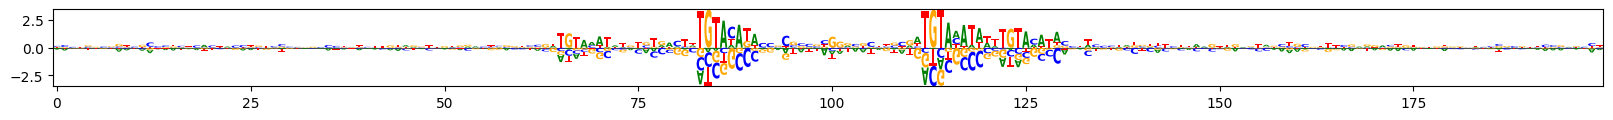

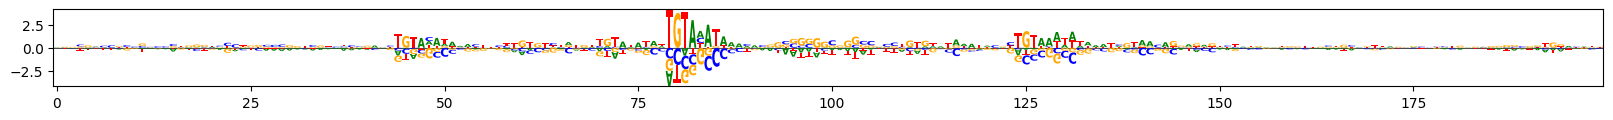

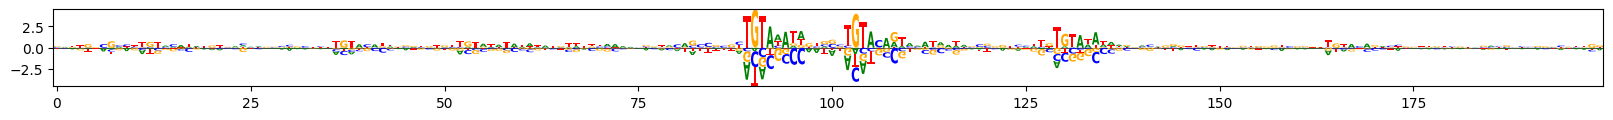

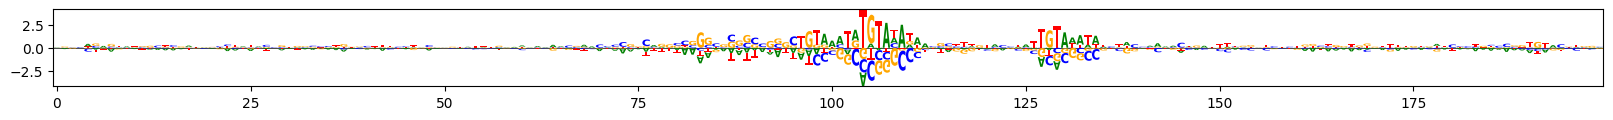

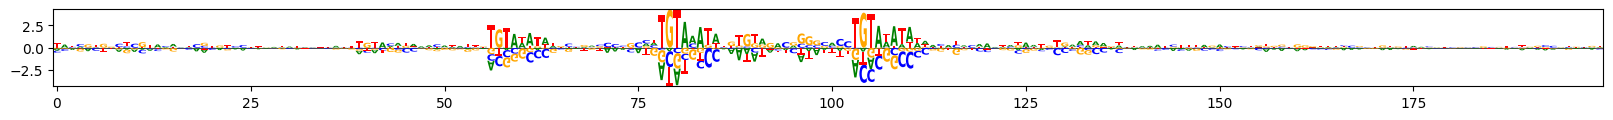

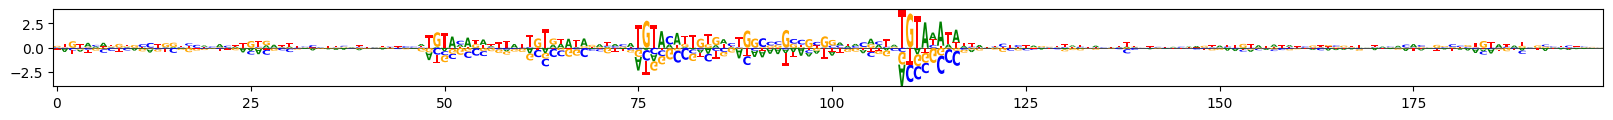

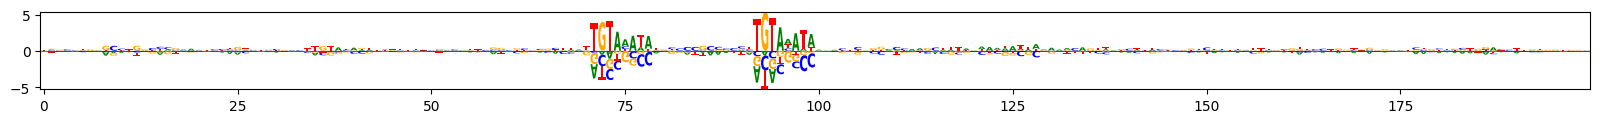

In [16]:
# Create a list to store the sequence indices and their corresponding saliency plots
sequence_sal_plots = []

# Loop through the sequences and their corresponding saliency maps
for idx, (sequence, saliency_map) in enumerate(zip(X, saliency_map)):
    fig = plt.figure(figsize=(20, 1))
    ax = plt.subplot(1, 1, 1)
    plot_saliency_map(saliency_map, alphabet, ax)
    
    # Save the saliency plot with the sequence index in the filename
    fig.savefig(f"saliency_map_seq{idx}.svg", dpi=300)
    sequence_sal_plots.append((idx, fig))

# Now, sequence_sal_plots contains the index and the corresponding saliency plots
print(sequence_sal_plots)

In [ ]:
y_test

In [15]:
y_pred = model.predict(x_test)

91/91 [==============================] - 0s 681us/step


In [23]:
b_pred = np.array(y_pred>=0.5)

In [ ]:
# Alternate way to calculate the model's accuracy
import sklearn.metrics
sklearn.metrics.accuracy_score(y_test,b_pred)

# Saliency Maps

In [1]:
sal_plots = []
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

#get model predictions for test sequences
predictions = model.predict(x_test)

# Get the top num_plots predictions
num_plots = 10

# Get the sorted indices
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Extract the top num_plots sequences
X = x_test[sorted_indices[:num_plots]]

# Reshape X to (num_plots, 200, 4)
X = X.reshape((num_plots, 200, 4))




#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  #plt.savefig("myimg.svg", dpi=300)
  #sal_plots.append(fig) 
  
#for fig in sal_plots:
  #fig.savefig("myimg_test2.pdf", format='pdf', dpi=300, bbox_inches='tight')

NameError: name 'tf' is not defined

In [16]:
predictions.shape

(2900, 1)

In [23]:
sorted_indices.shape

(1,)

In [11]:
#model.save('models_deepbind/DB1_U2AF1_K562_200.h5')   # Saving model

# DeepBind Exp in first Conv layer

In [25]:
model = deepbind_exp()
loss = keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam(learning_rate = 0.005)

# Compile the model
model.compile(
    loss=loss,
    optimizer=opti, 
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", name="auroc"),
        tf.keras.metrics.AUC(curve="PR", name="aupr"),  # add AUPR curve to track dataset bias
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
    ]
    )

# Define an early stopping callback
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(
    x_train, y_train, 
    batch_size=100, 
    epochs=100, 
    validation_data=(x_valid, y_valid),
    callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 1s 4ms/step - loss: 0.7150 - auroc: 0.5649 - aupr: 0.5405 - binary_accuracy: 0.5467 - val_loss: 0.6652 - val_auroc: 0.7349 - val_aupr: 0.7002 - val_binary_accuracy: 0.6549
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.5994 - auroc: 0.7353 - aupr: 0.6988 - binary_accuracy: 0.6754 - val_loss: 0.5170 - val_auroc: 0.8329 - val_aupr: 0.7993 - val_binary_accuracy: 0.7460
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.4480 - auroc: 0.8700 - aupr: 0.8615 - binary_accuracy: 0.7903 - val_loss: 0.3466 - val_auroc: 0.9447 - val_aupr: 0.9427 - val_binary_accuracy: 0.8723
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.3281 - auroc: 0.9350 - aupr: 0.9324 - binary_accuracy: 0.8620 - val_loss: 0.2744 - val_auroc: 0.9565 - val_aupr: 0.9505 - val_binary_accuracy: 0.9020
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2977 - auroc: 0

In [26]:
#evaluate the model
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 879us/step - loss: 0.3142 - auroc: 0.9492 - aupr: 0.9496 - binary_accuracy: 0.8603


[0.31416764855384827,
 0.9491969347000122,
 0.9496279954910278,
 0.8603448271751404]

# Saliency Maps

91/91 [==============================] - 0s 677us/step


/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fdbc81f4880>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fdc77192e20>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

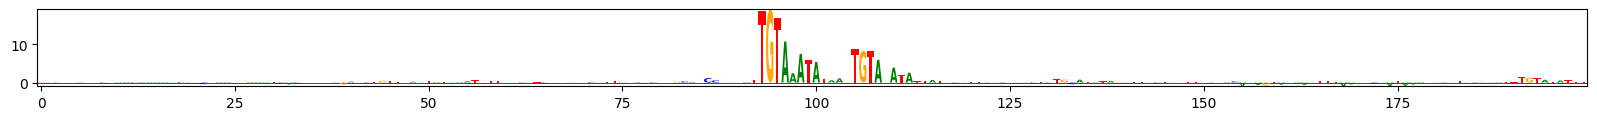

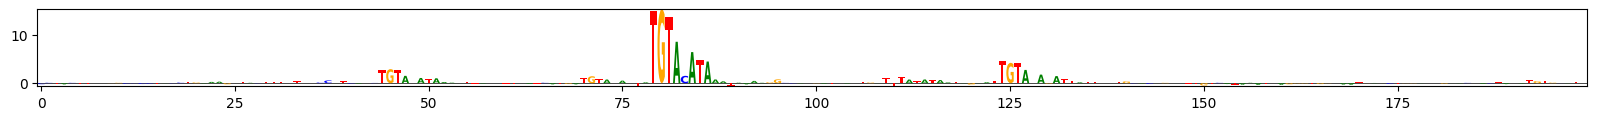

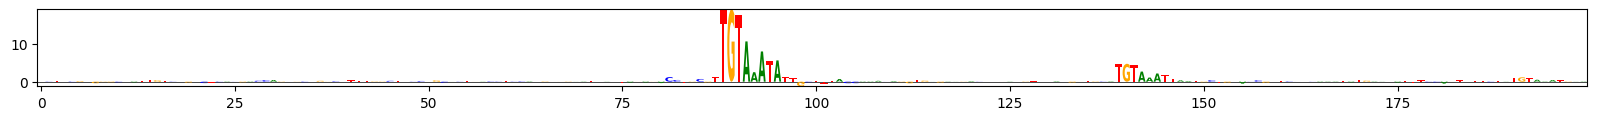

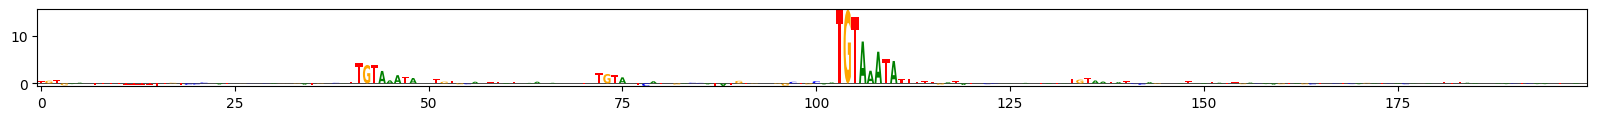

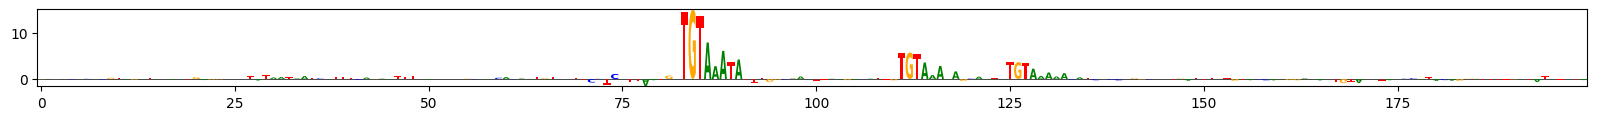

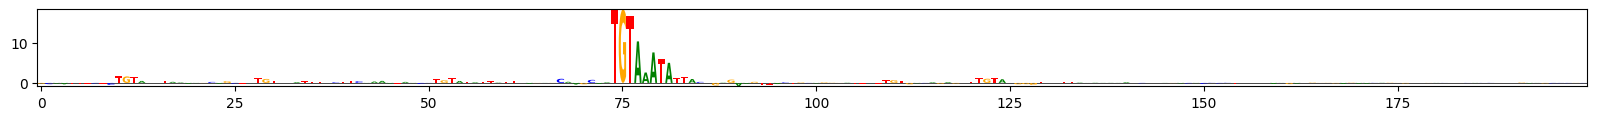

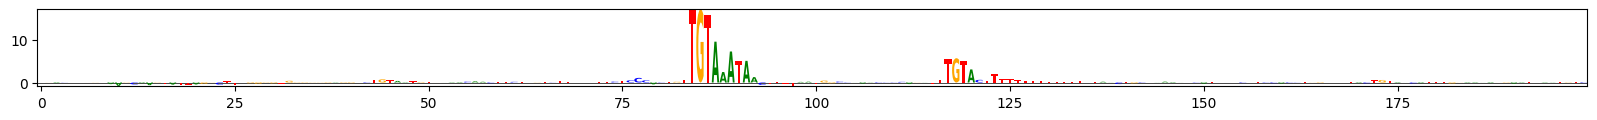

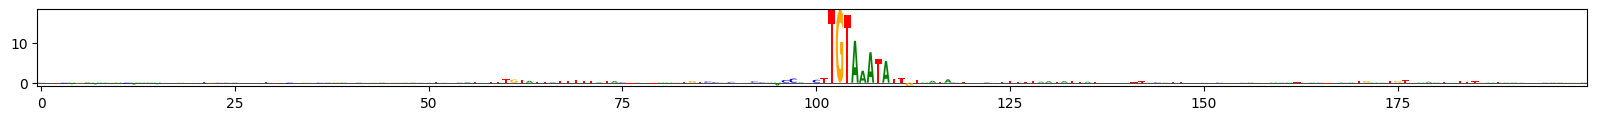

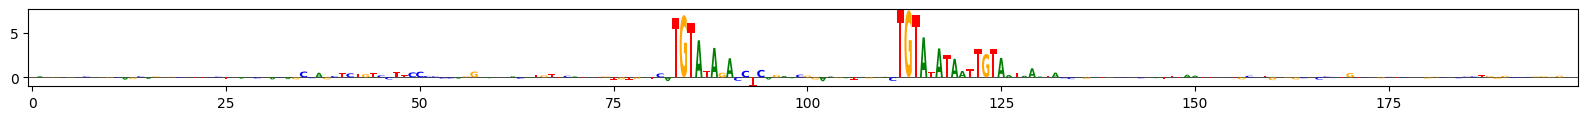

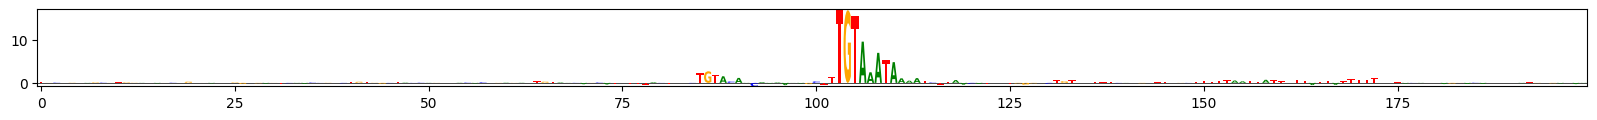

In [27]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

#get model predictions for test sequences
predictions = model.predict(x_test)

# Get the top num_plots predictions
num_plots = 10

# Get the sorted indices
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Extract the top num_plots sequences
X = x_test[sorted_indices[:num_plots]]

# Reshape X to (num_plots, 200, 4)
X = X.reshape((num_plots, 200, 4))




#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)

# Save model data to file

In [26]:
#model.save('models_deepbind/DB2_U2AF1_K562_200.h5') 

# Saliency Map calculation for deepbind_exponential in first Conv block for 1 sequence

In [43]:
#load deepbind_expo model
model = tf.keras.models.load_model('/home/pgarcia/rbp_project/models_deepbind3/deepbind_exp + PUM2_K562_200.h5')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 200, 16)           1552      
                                                                 
 activation (Activation)     (None, 200, 16)           0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 16)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                        

(1, 200, 4)
tf.Tensor(
[[[-4.31952402e-02  7.31734037e-02  6.11686967e-02 -1.19820125e-02]
  [-5.08642793e-02  3.39207910e-02  4.52680280e-03  3.31752710e-02]
  [-1.27780259e-01  3.33193243e-02  7.64025152e-02  1.41593702e-02]
  [-1.91595424e-02  6.68909177e-02 -3.00788470e-02  8.65127519e-02]
  [ 6.29300624e-02 -1.33835182e-01  3.78991142e-02  1.42331153e-01]
  [-8.92844610e-03  1.03330873e-01  1.50643557e-01 -5.92181906e-02]
  [-8.80455971e-03  5.61858453e-02  4.78899963e-02 -1.76715292e-02]
  [-3.13304402e-02  1.17365941e-01  1.47290304e-01 -1.54452473e-01]
  [-6.50110692e-02  8.62618908e-04  7.72448927e-02  2.87239868e-02]
  [ 6.81823194e-02 -1.40169427e-01 -7.21949711e-03  1.40919946e-02]
  [-1.36495993e-01  2.93347612e-02  4.35298122e-02  9.78637338e-02]
  [ 5.56945093e-02  6.79622889e-02  1.63426697e-01 -1.48565754e-01]
  [-1.02665223e-01 -4.24190573e-02  2.74156153e-01 -8.15953538e-02]
  [-1.37049228e-01  4.73488308e-02 -2.06536744e-02  3.38469609e-03]
  [ 2.82851644e-02  8.788

/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fd8647eb940>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7fd8647855b0>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

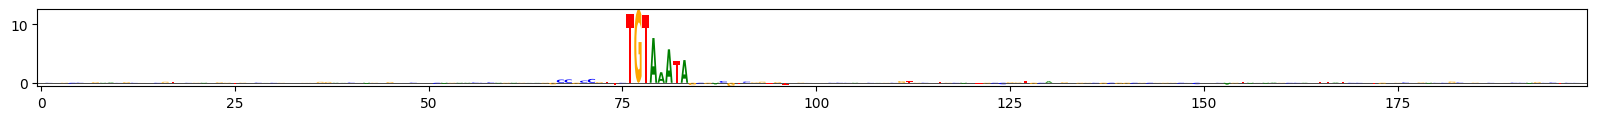

In [44]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

# Extract a sequence from x_test
X = x_test[498:499]
print(X.shape)

#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
print(saliency_map)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)
  
  # Save the saliency plot with the sequence index in the filename
  fig.savefig(f"sal_map_seq498_deepbind_expo_PUM2.svg", dpi=300)

# Representation Learning Model

In [28]:
from rbp_models import baseline_cnn, baseline_cnn_exp

In [17]:
#Compile the model
model = baseline_cnn()
loss = keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(
    loss=loss, 
    optimizer=opti, 
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", name="auroc"),
        tf.keras.metrics.AUC(curve="PR", name="aupr"),
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
    ]
    ) # add AUPR curve to track dataset bias

# Define an early stopping callback
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(
    x_train, y_train, 
    batch_size=100, 
    epochs=100, 
    validation_data=(x_valid, y_valid),
    callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 1s 8ms/step - loss: 0.5908 - auroc: 0.7456 - aupr: 0.7326 - val_loss: 0.4838 - val_auroc: 0.8522 - val_aupr: 0.8467
Epoch 2/100
102/102 [==============================] - 1s 6ms/step - loss: 0.4417 - auroc: 0.8748 - aupr: 0.8645 - val_loss: 0.3570 - val_auroc: 0.9303 - val_aupr: 0.9287
Epoch 3/100
102/102 [==============================] - 1s 6ms/step - loss: 0.3470 - auroc: 0.9256 - aupr: 0.9235 - val_loss: 0.3291 - val_auroc: 0.9366 - val_aupr: 0.9377
Epoch 4/100
102/102 [==============================] - 1s 6ms/step - loss: 0.2963 - auroc: 0.9465 - aupr: 0.9456 - val_loss: 0.3044 - val_auroc: 0.9453 - val_aupr: 0.9421
Epoch 5/100
102/102 [==============================] - 1s 6ms/step - loss: 0.2606 - auroc: 0.9584 - aupr: 0.9589 - val_loss: 0.3067 - val_auroc: 0.9455 - val_aupr: 0.9443
Epoch 6/100
102/102 [==============================] - 1s 6ms/step - loss: 0.2296 - auroc: 0.9678 - aupr: 0.9680 - val_loss: 0.3338 - val_auroc: 

In [18]:
#evaluate the model
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 1ms/step - loss: 0.3857 - auroc: 0.9357 - aupr: 0.9337


[0.3856959342956543, 0.9356776475906372, 0.9336599707603455]

# Saliency Analysis

91/91 [==============================] - 0s 1ms/step


/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f9f5c329400>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f9f5c329c10>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

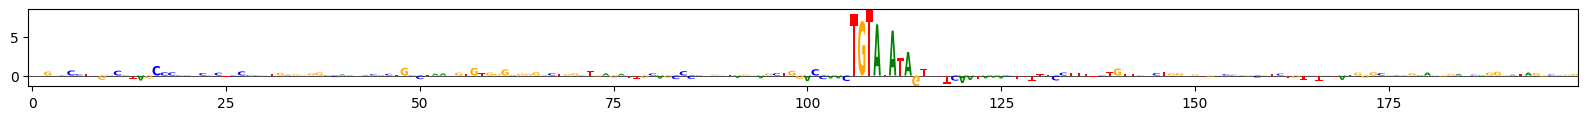

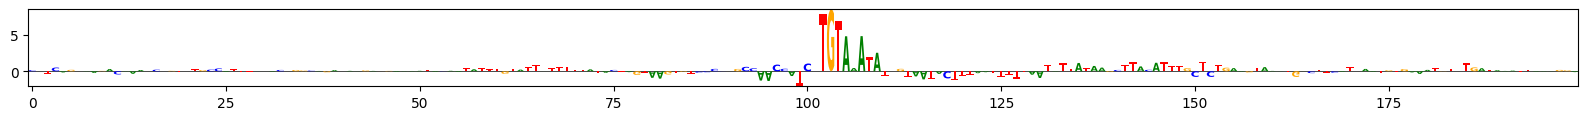

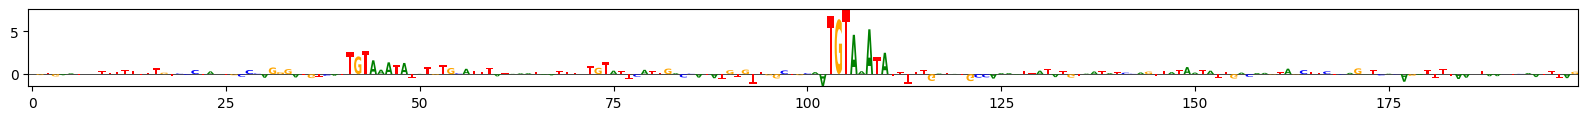

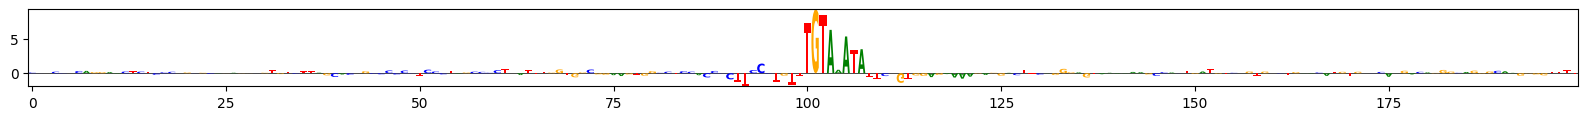

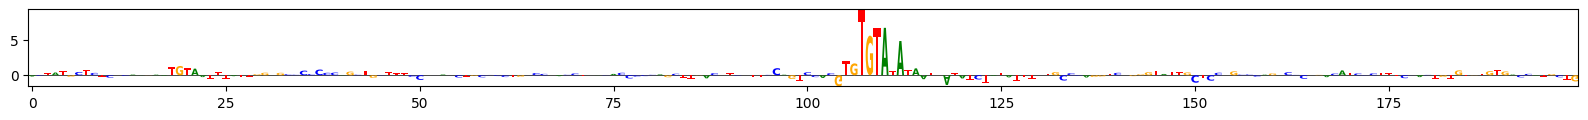

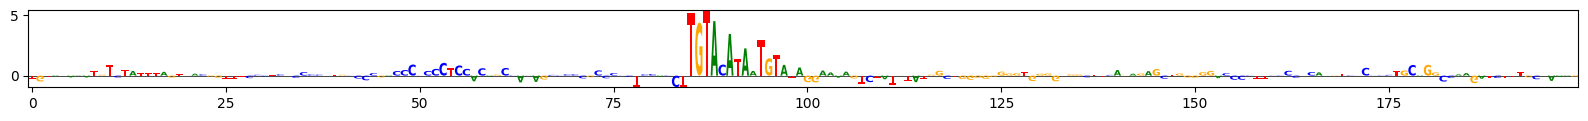

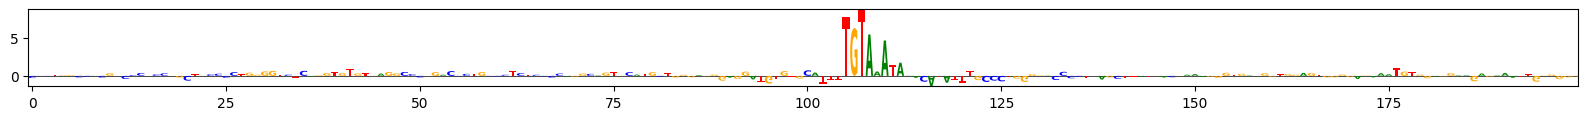

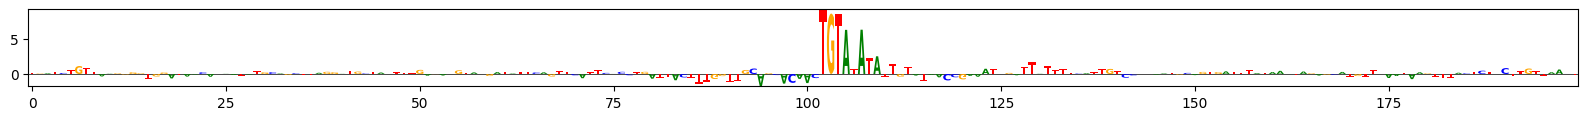

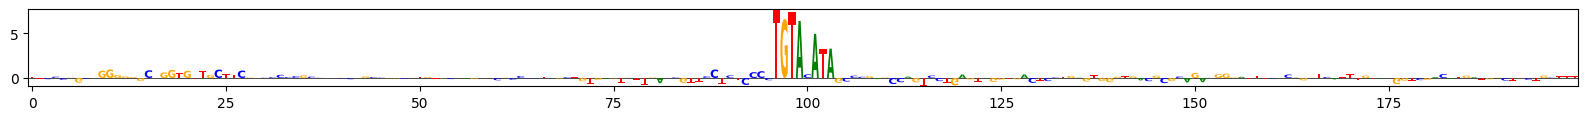

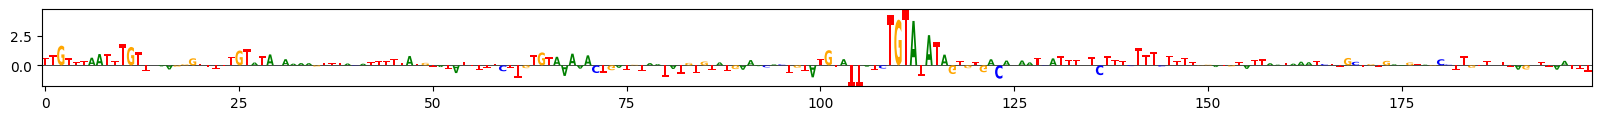

In [19]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

#get model predictions for test sequences
predictions = model.predict(x_test)

# Get the top num_plots predictions
num_plots = 10

# Get the sorted indices
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Extract the top num_plots sequences
X = x_test[sorted_indices[:num_plots]]

# Reshape X to (num_plots, 200, 4)
X = X.reshape((num_plots, 200, 4))


#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)

In [31]:
#model.save('models_deepbind/RB1_U2AF1_K562_200.h5') 

# Representation Learning Model w/ Exp function in 1D Conv Layer

In [20]:
#Compile the model
model = baseline_cnn_exp()
loss = keras.losses.BinaryCrossentropy()
opti = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(
    loss=loss, 
    optimizer=opti, 
    metrics=[
        tf.keras.metrics.AUC(curve="ROC", name="auroc"),
        tf.keras.metrics.AUC(curve="PR", name="aupr"),
        tf.keras.metrics.BinaryAccuracy(name='binary_accuracy', dtype=None)
    ]
    ) # add AUPR curve to track dataset bias

# Define an early stopping callback
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.fit(
    x_train, y_train, 
    batch_size=100, 
    epochs=100, 
    validation_data=(x_valid, y_valid),
    callbacks=[es_callback]
)

Epoch 1/100
102/102 [==============================] - 1s 8ms/step - loss: 0.5987 - auroc: 0.7381 - aupr: 0.7236 - val_loss: 0.4708 - val_auroc: 0.8640 - val_aupr: 0.8625
Epoch 2/100
102/102 [==============================] - 1s 6ms/step - loss: 0.4491 - auroc: 0.8688 - aupr: 0.8646 - val_loss: 0.3697 - val_auroc: 0.9343 - val_aupr: 0.9318
Epoch 3/100
102/102 [==============================] - 1s 6ms/step - loss: 0.3454 - auroc: 0.9266 - aupr: 0.9244 - val_loss: 0.3086 - val_auroc: 0.9483 - val_aupr: 0.9447
Epoch 4/100
102/102 [==============================] - 1s 6ms/step - loss: 0.3087 - auroc: 0.9416 - aupr: 0.9401 - val_loss: 0.2916 - val_auroc: 0.9480 - val_aupr: 0.9467
Epoch 5/100
102/102 [==============================] - 1s 6ms/step - loss: 0.2762 - auroc: 0.9534 - aupr: 0.9523 - val_loss: 0.3356 - val_auroc: 0.9476 - val_aupr: 0.9450
Epoch 6/100
102/102 [==============================] - 1s 6ms/step - loss: 0.2562 - auroc: 0.9598 - aupr: 0.9593 - val_loss: 0.2979 - val_auroc: 

In [21]:
#evaluate the model
model.evaluate(x_test, y_test)

91/91 [==============================] - 0s 1ms/step - loss: 0.3713 - auroc: 0.9350 - aupr: 0.9334


[0.37128156423568726, 0.9350263476371765, 0.9334183931350708]

# Saliency Analysis

91/91 [==============================] - 0s 1ms/step


/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f9f5ec50e20>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f9f5ec45430>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  glyph_df.loc[p, c] = glyph
/home/pgarcia/.conda/envs/tf_2/lib/python3.9/site-packages/logomaker/src/Logo.py:1131: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<logomaker.src.Glyph.Glyph object at 0x7f

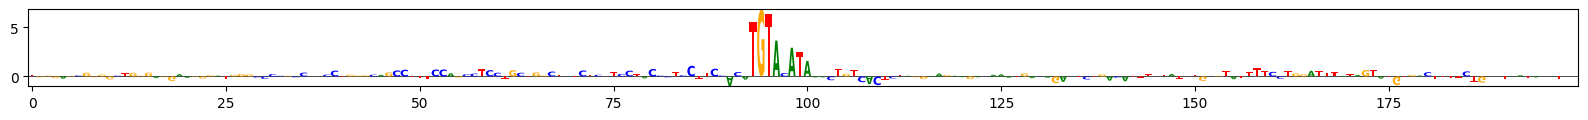

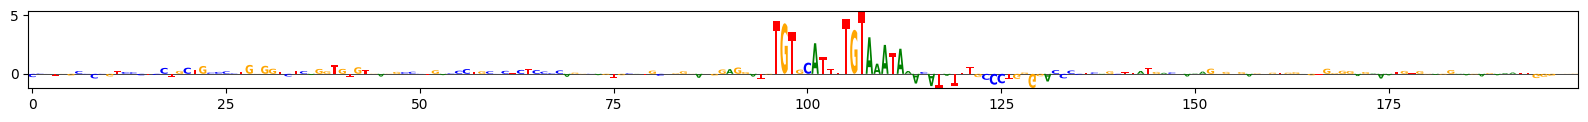

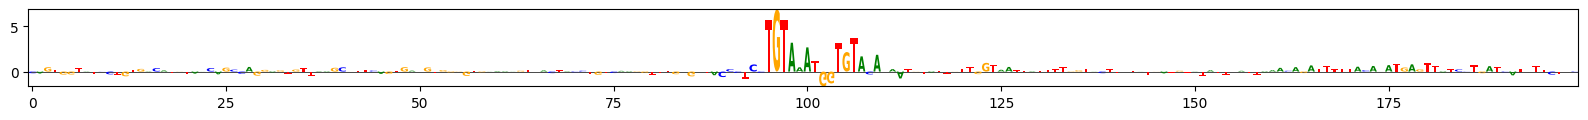

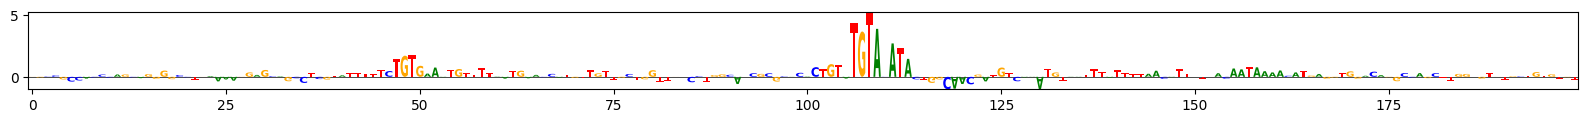

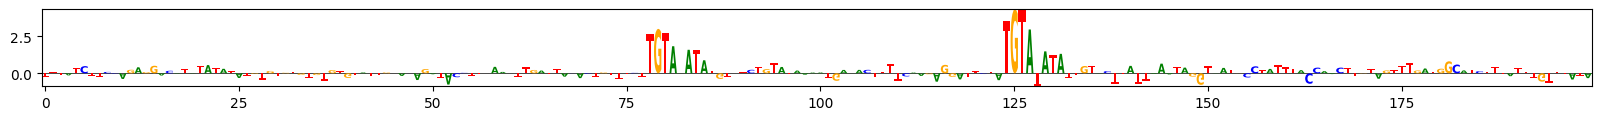

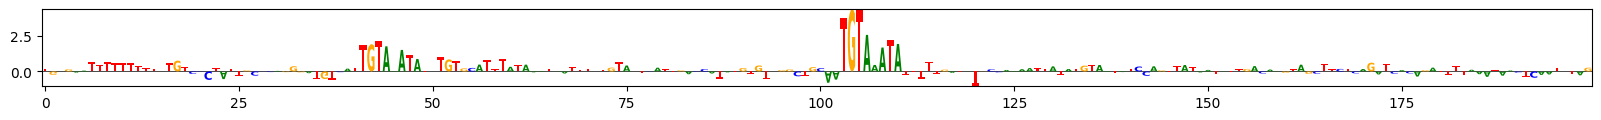

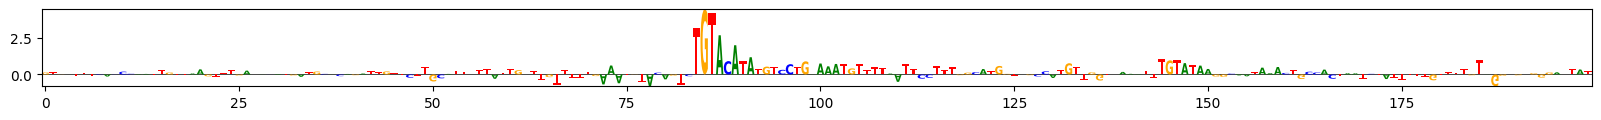

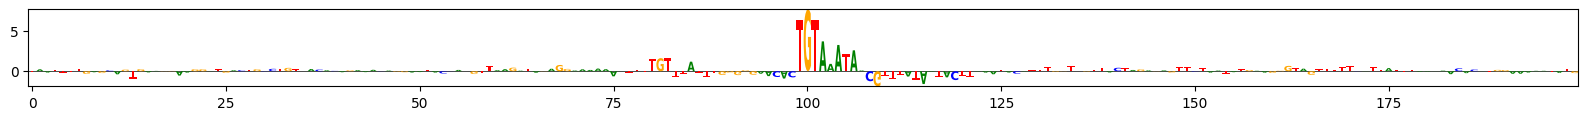

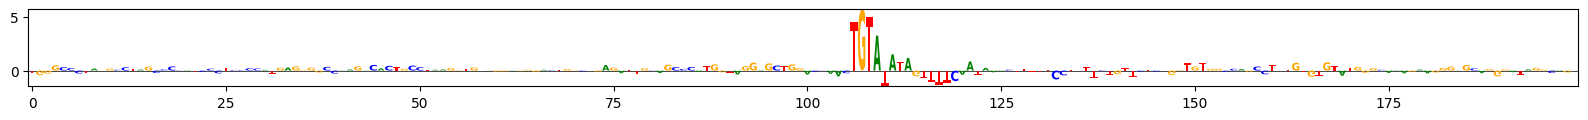

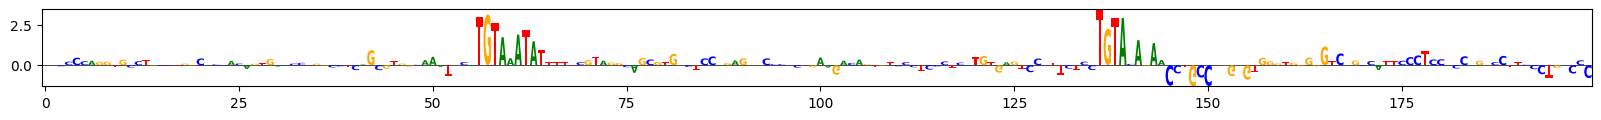

In [22]:
# get the pre-activated outputs
layer = tf.keras.Model(inputs=model.inputs, outputs=model.layers[-2].output) 

#get model predictions for test sequences
predictions = model.predict(x_test)

# Get the top num_plots predictions
num_plots = 10

# Get the sorted indices
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Extract the top num_plots sequences
X = x_test[sorted_indices[:num_plots]]

# Reshape X to (num_plots, 200, 4)
X = X.reshape((num_plots, 200, 4))




#########################################################
import tensorflow as tf

@tf.function
def calculate_saliency_map(X, model, class_index=0):
  """fast function to generate saliency maps"""
  if not tf.is_tensor(X):
    X = tf.Variable(X)

  with tf.GradientTape() as tape:
    tape.watch(X)
    output = model(X)[:,class_index]
  return tape.gradient(output, X)

# calculate saliency maps
saliency_map = calculate_saliency_map(X, layer)
saliency_map = saliency_map.numpy()
# gradient correction
saliency_map -= np.mean(saliency_map, axis=2, keepdims=True)

#########################################################
import pandas as pd
import logomaker

def plot_saliency_map(scores, alphabet, ax=None):
  L,A = scores.shape
  counts_df = pd.DataFrame(data=0.0, columns=list(alphabet), index=list(range(L)))
  for a in range(A):
    for l in range(L):
      counts_df.iloc[l,a] = scores[l,a]

  if not ax:
    ax = plt.subplot(1,1,1)
  logomaker.Logo(counts_df, ax=ax)


saliency_scores = saliency_map * X
for scores in saliency_scores:
  fig = plt.figure(figsize=(20,1))
  ax = plt.subplot(1,1,1)
  plot_saliency_map(scores, alphabet, ax)

In [35]:
predictions[sorted_indices[40:50]]

array([[0.9999631 ],
       [0.9999628 ],
       [0.99996257],
       [0.99995977],
       [0.9999595 ],
       [0.9999595 ],
       [0.9999593 ],
       [0.9999588 ],
       [0.99995846],
       [0.9999558 ]], dtype=float32)

In [36]:
#model.save('models_deepbind/RB2_U2AF1_K562_200.h5') 

In [ ]:
# Option 1: compare the sorted_indices across all model prediction to check if there is a common top predictor

#Option 2: get the index for positive label in y_test